# Exploring Aircrafts And Their Risks: A Data-Driven Approach

#### Author: Caleb Kimondo
***

## Overview

Choosing aircrafts for investment purposes is difficult due to the many risks that a particular aircraft encompasses. The aim of this project is to explore various aircrafts and the accompanied risks, in order to make a learned approach of choosing an aircraft with the lowest risk. The dataset is from the National Transportation Safety Board that includes aviation accident data from 1962 to 2023 about civil aviation accidents and selected incidents in the United States and international waters.

## Data Understanding
***

In [2]:
# Import standard packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [3]:
# Create a variable to save the dataset
aviation_data = pd.read_csv('Aviation_data.csv')

# View the dataset
aviation_data

C:\Users\Admin\anaconda3\envs\learn-env\lib\site-packages\IPython\core\interactiveshell.py:3145: DtypeWarning: Columns (6,7,28) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.9222,-81.8781,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90343,20221227106491,Accident,ERA23LA093,2022-12-26,"Annapolis, MD",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,0.0,1.0,0.0,0.0,NaN,NaN,NaN,29-12-2022
90344,20221227106494,Accident,ERA23LA095,2022-12-26,"Hampton, NH",United States,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
90345,20221227106497,Accident,WPR23LA075,2022-12-26,"Payson, AZ",United States,341525N,1112021W,PAN,PAYSON,...,Personal,NaN,0.0,0.0,0.0,1.0,VMC,NaN,NaN,27-12-2022
90346,20221227106498,Accident,WPR23LA076,2022-12-26,"Morgan, UT",United States,NaN,NaN,NaN,NaN,...,Personal,MC CESSNA 210N LLC,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN


In [4]:
aviation_data.shape

(90348, 31)

From above, we can see that the dataset has 90348 rows and 31 columns

In [5]:
# Enables the viewing of column names, their data types and the number of values in them
aviation_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90348 entries, 0 to 90347
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      90348 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50249 non-null  object 
 9   Airport.Name            52790 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87572 non-null  object 
 14  Make                    88826 non-null

In [7]:
# Returns the number of null values in each column
aviation_data.isna().sum()

Event.Id                   1459
Investigation.Type            0
Accident.Number            1459
Event.Date                 1459
Location                   1511
Country                    1685
Latitude                  55966
Longitude                 55975
Airport.Code              40099
Airport.Name              37558
Injury.Severity            2459
Aircraft.damage            4653
Aircraft.Category         58061
Registration.Number        2776
Make                       1522
Model                      1551
Amateur.Built              1561
Number.of.Engines          7543
Engine.Type                8536
FAR.Description           58325
Schedule                  77766
Purpose.of.flight          7651
Air.carrier               73700
Total.Fatal.Injuries      12860
Total.Serious.Injuries    13969
Total.Minor.Injuries      13392
Total.Uninjured            7371
Weather.Condition          5951
Broad.phase.of.flight     28624
Report.Status              7840
Publication.Date          16689
dtype: i

From above, we can see that some columns have a lot of missing values, for example the Schedule column, Air.carrier column and FAR.Description.

In [8]:
# Returns the percentage of missing values in each column
percent_missing = aviation_data.isnull().sum() * 100 / len(aviation_data)
percent_missing = percent_missing.sort_values(ascending = False)
percent_missing

Schedule                  86.073848
Air.carrier               81.573471
FAR.Description           64.555939
Aircraft.Category         64.263736
Longitude                 61.954886
Latitude                  61.944924
Airport.Code              44.382831
Airport.Name              41.570372
Broad.phase.of.flight     31.681941
Publication.Date          18.471909
Total.Serious.Injuries    15.461327
Total.Minor.Injuries      14.822686
Total.Fatal.Injuries      14.233851
Engine.Type                9.447913
Report.Status              8.677558
Purpose.of.flight          8.468367
Number.of.Engines          8.348829
Total.Uninjured            8.158454
Weather.Condition          6.586753
Aircraft.damage            5.150086
Registration.Number        3.072564
Injury.Severity            2.721698
Country                    1.865011
Amateur.Built              1.727764
Model                      1.716695
Make                       1.684597
Location                   1.672422
Event.Date                 1

By finding the percentage of missing values in each column, I can choose the best way to deal with the missing values.

In [9]:
# Finding out the number of duplicate events based on the Event.Id column
duplicates = aviation_data[aviation_data.duplicated(subset='Event.Id')]
print(len(duplicates))
duplicates

2396


,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
118,20020917X01908,Accident,DCA82AA012A,1982-01-19,"ROCKPORT, TX",United States,NaN,NaN,RKP,ARANSAS COUNTY AIRPORT,...,Executive/corporate,NaN,3.0,0.0,0.0,0.0,IMC,Approach,Probable Cause,19-01-1983
159,20020917X02400,Accident,MIA82FA038A,1982-01-23,"NEWPORT RICHEY, FL",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,0.0,0.0,0.0,3.0,VMC,Approach,Probable Cause,23-01-1983
160,20020917X02259,Accident,LAX82FA049B,1982-01-23,"VICTORVILLE, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,4.0,0.0,VMC,Cruise,Probable Cause,23-01-1983
245,20020917X02585,Accident,SEA82DA028B,1982-02-06,"MEDFORD, OR",United States,NaN,NaN,MFR,MEDFORD-JACKSON COUNTY,...,Personal,NaN,0.0,0.0,0.0,3.0,VMC,Taxi,Probable Cause,06-02-1983
248,20020917X02173,Accident,LAX82DA065A,1982-02-06,"SAN JOSE, CA",United States,NaN,NaN,RHV,RIED HILLVIEW,...,Personal,NaN,0.0,0.0,0.0,3.0,VMC,Taxi,Probable Cause,06-02-1983
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90097,NaN,20-12-2022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
90236,20221112106276,Accident,CEN23MA034,2022-11-12,"Dallas, TX",United States,324026N,0965146W,RBD,Dallas Executive,...,ASHO,Commemorative Air Force,6.0,0.0,0.0,0.0,VMC,NaN,NaN,30-11-2022
90255,20221121106336,Accident,WPR23LA041,2022-11-18,"Las Vegas, NV",United States,361239N,1151140W,VGT,NORTH LAS VEGAS,...,Instructional,702 HELICOPTER INC,0.0,0.0,0.0,3.0,VMC,NaN,NaN,07-12-2022
90257,20221122106340,Incident,DCA23WA071,2022-11-18,"Marrakech,",Morocco,NaN,NaN,NaN,NaN,...,NaN,Valair Private Jets,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN


## Data Preparation
***

### Dealing with duplicate values

First, I will drop the duplicates values.

In [10]:
aviation_data = aviation_data.drop_duplicates(subset = 'Event.Id')
aviation_data

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.9222,-81.8781,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90343,20221227106491,Accident,ERA23LA093,2022-12-26,"Annapolis, MD",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,0.0,1.0,0.0,0.0,NaN,NaN,NaN,29-12-2022
90344,20221227106494,Accident,ERA23LA095,2022-12-26,"Hampton, NH",United States,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
90345,20221227106497,Accident,WPR23LA075,2022-12-26,"Payson, AZ",United States,341525N,1112021W,PAN,PAYSON,...,Personal,NaN,0.0,0.0,0.0,1.0,VMC,NaN,NaN,27-12-2022
90346,20221227106498,Accident,WPR23LA076,2022-12-26,"Morgan, UT",United States,NaN,NaN,NaN,NaN,...,Personal,MC CESSNA 210N LLC,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN


### Dealing with missing values

### Columns

Let's revisit the percentage of missing values in each column

In [11]:
percent_missing

Schedule                  86.073848
Air.carrier               81.573471
FAR.Description           64.555939
Aircraft.Category         64.263736
Longitude                 61.954886
Latitude                  61.944924
Airport.Code              44.382831
Airport.Name              41.570372
Broad.phase.of.flight     31.681941
Publication.Date          18.471909
Total.Serious.Injuries    15.461327
Total.Minor.Injuries      14.822686
Total.Fatal.Injuries      14.233851
Engine.Type                9.447913
Report.Status              8.677558
Purpose.of.flight          8.468367
Number.of.Engines          8.348829
Total.Uninjured            8.158454
Weather.Condition          6.586753
Aircraft.damage            5.150086
Registration.Number        3.072564
Injury.Severity            2.721698
Country                    1.865011
Amateur.Built              1.727764
Model                      1.716695
Make                       1.684597
Location                   1.672422
Event.Date                 1

In one line, I will:
1. Drop the Air.carrier and Schedule columns since they have the most missing values: over 80%. I will drop all irrelevant columns.
2. Drop the Aircraft.Category, Airport.Code and Airport.Name columns because they are irrelevant and have a high percentage of missing values(over 40%).
3. Drop the Longitude, FAR.Description and Latitude columns because they have a high percentage of missing values (60%) and is irrelevant.
4. Drop any other irrelevant column

In [12]:
aviation_data = aviation_data.drop(['Air.carrier', 'Schedule', 'Aircraft.Category', 'Airport.Code', 'Airport.Name', 'Longitude', 'Latitude', 'FAR.Description', 'Publication.Date', 'Registration.Number', 'Country', 'Location', 'Report.Status', 'Weather.Condition'], axis = 1)
aviation_data
aviation_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87952 entries, 0 to 90347
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                87951 non-null  object 
 1   Investigation.Type      87952 non-null  object 
 2   Accident.Number         87951 non-null  object 
 3   Event.Date              87951 non-null  object 
 4   Injury.Severity         86961 non-null  object 
 5   Aircraft.damage         84848 non-null  object 
 6   Make                    87888 non-null  object 
 7   Model                   87859 non-null  object 
 8   Amateur.Built           87851 non-null  object 
 9   Number.of.Engines       81924 non-null  float64
 10  Engine.Type             80927 non-null  object 
 11  Purpose.of.flight       81829 non-null  object 
 12  Total.Fatal.Injuries    76684 non-null  float64
 13  Total.Serious.Injuries  75629 non-null  float64
 14  Total.Minor.Injuries    76191 non-null

The Broad.phase.of.flight column has a missing value percentage of 30%. Since this column consists of categorical data and is important in my analysis. I decided to drop the rows that consist of NaN values in the column. 

In [13]:
aviation_data = aviation_data.dropna(subset=['Broad.phase.of.flight'])
aviation_data
aviation_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60837 entries, 0 to 63911
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                60837 non-null  object 
 1   Investigation.Type      60837 non-null  object 
 2   Accident.Number         60837 non-null  object 
 3   Event.Date              60837 non-null  object 
 4   Injury.Severity         60837 non-null  object 
 5   Aircraft.damage         59459 non-null  object 
 6   Make                    60826 non-null  object 
 7   Model                   60807 non-null  object 
 8   Amateur.Built           60819 non-null  object 
 9   Number.of.Engines       59942 non-null  float64
 10  Engine.Type             60456 non-null  object 
 11  Purpose.of.flight       59790 non-null  object 
 12  Total.Fatal.Injuries    50299 non-null  float64
 13  Total.Serious.Injuries  49618 non-null  float64
 14  Total.Minor.Injuries    50248 non-null

The two columns, 'Total.Fatal.Injuries' and 'Injury.Severity' contain similar data, yet 'Injury.Severity' contains no missing values. Therefore, I will create a new column 'Fatality' to show numerical data of the 'Injury.Severity', and drop the 'Total.Fatal.Injuries' and 'Injury.'column.

In [14]:
# Extracts the number from each value in the Injury.Severity column. e.g Fatal(2) -> 2 and fills the Fatility column with those numbers
aviation_data['Fatality'] = aviation_data['Injury.Severity'].str.extract(r'\((\d+)\)')

# Fills the NaN values in the Fatility column with categorical values from Injury.Severitiy
aviation_data['Fatality'].fillna(aviation_data['Injury.Severity'], inplace=True)

# Replaces the categorical values with 0
aviation_data['Fatality'].replace({'Non-Fatal': 0, 'Minor': 0, 'Serious': 0, 'Incident': 0}, inplace=True)

# 
aviation_data['Fatality'] = aviation_data.apply(lambda row: row['Total.Fatal.Injuries'] if row['Fatality'] == 'Fatal' else row['Fatality'], axis=1)

# Replaces the 'Unavailable' values with NaN
aviation_data['Fatality'].replace('Unavailable', np.nan, inplace=True)

# Changes the values from strings to integers
aviation_data['Fatality'][~aviation_data['Fatality'].isna()] = aviation_data['Fatality'][~aviation_data['Fatality'].isna()].astype(int)

# Changes to float
pd.options.display.float_format = '{:.0f}'.format

aviation_data = aviation_data.drop(['Injury.Severity','Total.Fatal.Injuries'], axis = 1)
aviation_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60837 entries, 0 to 63911
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                60837 non-null  object 
 1   Investigation.Type      60837 non-null  object 
 2   Accident.Number         60837 non-null  object 
 3   Event.Date              60837 non-null  object 
 4   Aircraft.damage         59459 non-null  object 
 5   Make                    60826 non-null  object 
 6   Model                   60807 non-null  object 
 7   Amateur.Built           60819 non-null  object 
 8   Number.of.Engines       59942 non-null  float64
 9   Engine.Type             60456 non-null  object 
 10  Purpose.of.flight       59790 non-null  object 
 11  Total.Serious.Injuries  49618 non-null  float64
 12  Total.Minor.Injuries    50248 non-null  float64
 13  Total.Uninjured         55871 non-null  float64
 14  Broad.phase.of.flight   60837 non-null

<ipython-input-14-edb5534a46bb>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aviation_data['Fatality'][~aviation_data['Fatality'].isna()] = aviation_data['Fatality'][~aviation_data['Fatality'].isna()].astype(int)


Next, I will create a new column 'Date' and extract the years from the 'Event.Date' column. I will then drop the 'Event.Date' column.

In [15]:
# Convert the Event.Date column to date type
aviation_data['Event.Date'] = pd.to_datetime(aviation_data['Event.Date'], format='%Y-%m-%d')

# Create a new column ('Year') that contains extracted years from the 'Event.Date' column
aviation_data['Year'] = aviation_data['Event.Date'].dt.year

aviation_data = aviation_data.drop(['Event.Date'], axis = 1)

In [16]:
# Check the percentage of missing values per column for the updated dataset
tmp = aviation_data
percent_missing = tmp.isnull().sum() * 100 / len(aviation_data)
percent_missing = percent_missing.sort_values(ascending = False)
percent_missing

Total.Serious.Injuries   18
Total.Minor.Injuries     17
Total.Uninjured           8
Aircraft.damage           2
Purpose.of.flight         2
Number.of.Engines         1
Engine.Type               1
Model                     0
Amateur.Built             0
Make                      0
Fatality                  0
Year                      0
Broad.phase.of.flight     0
Accident.Number           0
Investigation.Type        0
Event.Id                  0
dtype: float64

There are still some missing values, notably in the 'Total.Serious.Injuries' and 'Total.Minor.Injuries' columns but I do not find them significant in my analysis.

## Data Modeling

Let's investigate the relationship of make, models and accidents.

In [24]:
# Making a subset of Make, Model and adding an Accident Count of each aircraft
makes_models_accident_counts = aviation_data.groupby(['Make', 'Model']).size().reset_index(name='Accident_count', drop=False)
makes_models_accident_counts = makes_models_accident_counts.sort_values(by='Accident_count', ascending=False)
makes_models_accident_counts

,Make,Model,Accident_count
2988,Cessna,152,2061
3008,Cessna,172,1003
3051,Cessna,172N,956
8740,Piper,PA-28-140,787
2963,Cessna,150,655
...,...,...,...
4914,Eurocopter Deutschland Gmbh,MBB BK-117 A4,1
4915,Eurocopter France,AS 350 B2,1
4916,Eurocopter France,AS 350 B3,1
4917,Eurocopter France,AS 350 BA,1


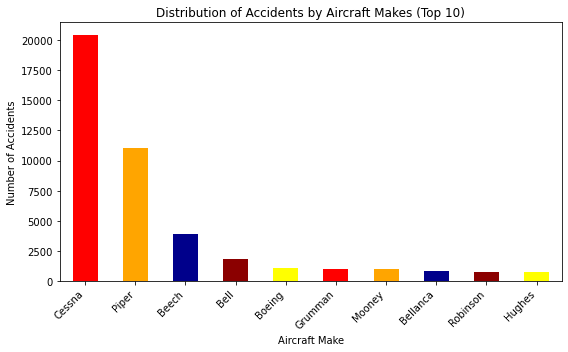

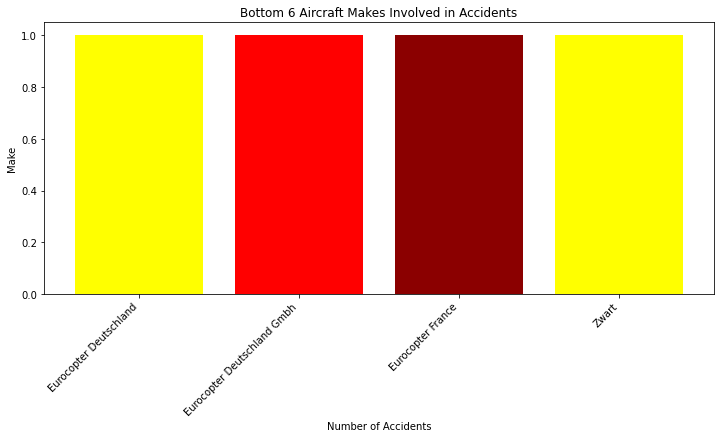

In [27]:
# Find the top 10 makes
top_10_makes = aviation_data['Make'].value_counts().nlargest(10).sort_values(ascending = False)

plt.figure(figsize=(8, 5))

# Plot the first visualization
color = ['red', 'orange', 'darkblue', 'darkred', 'yellow']
top_10_makes.plot(kind = 'bar', color=color)
plt.title('Distribution of Accidents by Aircraft Makes (Top 10)')
plt.xlabel('Aircraft Make')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45, ha='right')  
plt.tight_layout()

# Plot the second visualization
fig, axes = plt.subplots(figsize=(12, 5))
bottom_10_makes = makes_models_accident_counts.tail(10)
axes.bar(bottom_10_makes['Make'], bottom_10_makes['Accident_count'], color=color)
axes.set_xlabel('Number of Accidents')
axes.set_ylabel('Make')
axes.set_title('Bottom 4 Aircraft Makes Involved in Accidents')
plt.xticks(rotation=45, ha='right')  


plt.show()

From above, we can see that Cessnas are responsible for a significant number of accidents, and that .

Since Cessnas are most responsible for the accidents, let's see what specific model was most responsible. 

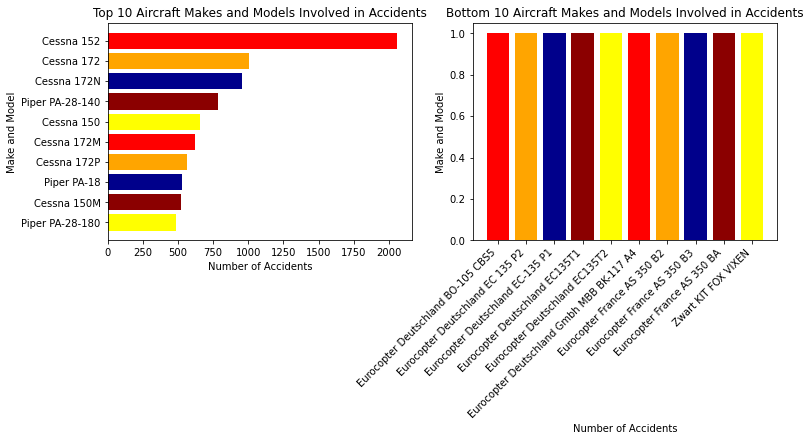

In [28]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Plot the first visualization
color = ['red', 'orange', 'darkblue', 'darkred', 'yellow']
top_10_make_model = makes_models_accident_counts.head(10)
axes[0].barh(top_10_make_model['Make'] + ' ' + top_10_make_model['Model'], top_10_make_model['Accident_count'], color=color)
axes[0].set_xlabel('Number of Accidents')
axes[0].set_ylabel('Make and Model')
axes[0].set_title('Top 10 Aircraft Makes and Models Involved in Accidents')
axes[0].invert_yaxis()

# Plot the second visualization
bottom_10_make_model = makes_models_accident_counts.tail(10)
axes[1].bar(bottom_10_make_model['Make'] + ' ' + bottom_10_make_model['Model'], bottom_10_make_model['Accident_count'], color=color)
axes[1].set_xlabel('Number of Accidents')
axes[1].set_ylabel('Make and Model')
axes[1].set_title('Bottom 10 Aircraft Makes and Models Involved in Accidents')
plt.xticks(rotation=45, ha='right')  

plt.show()

From above, we can see that the Cessna 152 had the most acccidents (at over 2000 accidents) while all bottom 10 models had 1 accident each.

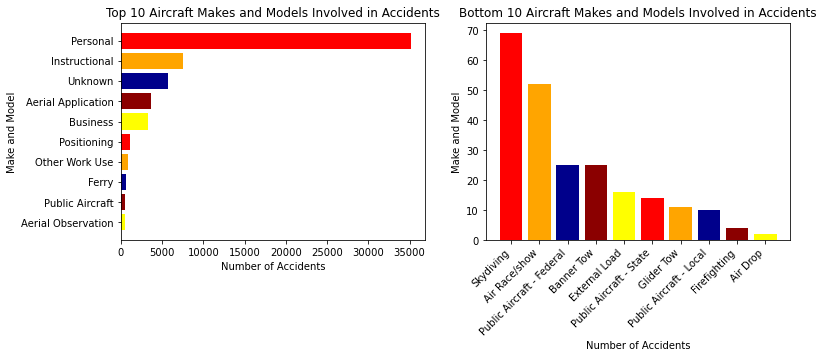

In [29]:
purposes = aviation_data['Purpose.of.flight'].value_counts()

fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Plot the first visualization

color = ['red', 'orange', 'darkblue', 'darkred', 'yellow']
top_10_purposes = purposes.head(10)

# Convert the index and values to list type in order to plot the visualization
axes[0].barh(list(top_10_purposes.index), list(top_10_purposes.values), color=color)
axes[0].set_xlabel('Number of Accidents')
axes[0].set_ylabel('Make and Model')
axes[0].set_title('Top 10 Aircraft Makes and Models Involved in Accidents')
axes[0].invert_yaxis()
  

# Plot the second visualization

bottom_10_purposes = purposes.tail(10)

# Convert the index and values to list type in order to plot the visualization
axes[1].bar(list(bottom_10_purposes.index), list(bottom_10_purposes.values), color=color)
axes[1].set_xlabel('Number of Accidents')
axes[1].set_ylabel('Make and Model')
axes[1].set_title('Bottom 10 Aircraft Makes and Models Involved in Accidents')
plt.xticks(rotation=45, ha='right')  

plt.show()

As a recommendation for the purchase and operation of an aircraft, I would recommend to use either the aircrafts listed below as they have the least number of accidents in the dataset:

In [23]:
bottom_10_make_model

,Make,Model,Accident_count
4909,Eurocopter Deutschland,BO-105 CBS5,1
4910,Eurocopter Deutschland,EC 135 P2,1
4911,Eurocopter Deutschland,EC-135 P1,1
4912,Eurocopter Deutschland,EC135T1,1
4913,Eurocopter Deutschland,EC135T2,1
4914,Eurocopter Deutschland Gmbh,MBB BK-117 A4,1
4915,Eurocopter France,AS 350 B2,1
4916,Eurocopter France,AS 350 B3,1
4917,Eurocopter France,AS 350 BA,1
11861,Zwart,KIT FOX VIXEN,1
